In [1]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import random

In [2]:
lats = np.random.uniform(-90,90,size=1500)
lngs = np.random.uniform(-90,90,size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs 

In [3]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [4]:
for coordinate in coordinates:
    print(coordinate[0],coordinate[1])

18.412295393507506 -1.5549107592821798
-26.414743758550387 44.68026716324971
-41.57954835325765 -46.77568375738475
-69.56240475375171 -65.95848270304025
7.348575776929309 85.30945270895634
-35.52398729996719 60.64673200161755
-8.833583993829421 -16.072531484934814
88.83992676764359 26.378066573320837
-20.192740682753936 75.3752188098008
-23.594047271245614 -39.040402071971144
-13.87538442415844 -2.885314210942539
37.43605078607476 76.93028941828919
-77.64391166613578 48.97036847568634
-52.514562639799394 40.29165776783222
-32.01579190183011 23.965516964300747
-75.10018642516684 -56.137995612362594
52.96163849826962 79.16371358412607
-19.612025101717634 29.823051275568247
-69.4946700790983 -1.7693744610543405
45.53606301946195 75.95507349740993
51.69302224948419 55.62394149220896
71.57807272220123 -44.945265102698414
9.950187628083569 -1.6531785859350236
-27.11844813017249 37.286012889233945
-11.121908501712952 46.30295490384677
-26.012446434675994 -2.354059690669814
25.783740192473218 

5.135407379040203 -18.953358843986564
89.28934195231909 48.266846771880466
69.57905512337217 -28.832776451062344
-28.825380116997145 -52.00407193385883
15.168084448874595 -22.479752010061844
26.27787815990291 -33.52367991358055
29.32888320059888 87.96095194573076
41.339547078190094 78.00529088037715
-84.22369954414641 -1.1581481757562813
-57.36928401314804 -74.64540415585348
-56.331456611392326 25.096966077939328
-5.898588523407824 14.955325393360553
-24.7226477165255 -51.32211281222203
-28.61794169470764 68.62446548704563
44.37056201489372 89.67517969947374
-22.17764863653747 78.62089102301661
-63.942737528675224 35.30923633972046
55.22398025082978 55.97530474033985
-86.31260391053006 12.542209730025832
-57.89560253887412 -82.01574537713918
-55.01707024976216 53.11655127499492
-67.5809961367481 45.488516314461975
-76.52996475402449 -39.775849950898845
74.02618489639727 13.267174189739237
-27.91119087632027 -89.70608412837908
31.319421802635702 -51.598733940884266
27.18222569204113 -18

In [5]:
# Use the citipy module to determine city based on latitude and longitude.
from citipy import citipy

In [6]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name
    
    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

610

In [7]:
# Import the requests library.
import requests

# Import the API key.
from config import weather_api_key

In [8]:
# Import the datetime module from the datetime library.
from datetime import datetime

In [9]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key

In [10]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

Beginning Data Retrieval     
-----------------------------


In [11]:
# Loop through all the cities in the list.
for i, city in enumerate(cities):
   
    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
    # Create endpoint URL with each city.
    city_url = url + "&q=" + city

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    
# Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Processing Record 1 of Set 1 | araouane
Processing Record 2 of Set 1 | beloha
Processing Record 3 of Set 1 | chuy
Processing Record 4 of Set 1 | ushuaia
Processing Record 5 of Set 1 | kalmunai
Processing Record 6 of Set 1 | saint-philippe
Processing Record 7 of Set 1 | georgetown
Processing Record 8 of Set 1 | longyearbyen
Processing Record 9 of Set 1 | grand river south east
City not found. Skipping...
Processing Record 10 of Set 1 | sao joao da barra
Processing Record 11 of Set 1 | jamestown
Processing Record 12 of Set 1 | shache
Processing Record 13 of Set 1 | port alfred
Processing Record 14 of Set 1 | east london
Processing Record 15 of Set 1 | graaff-reinet
Processing Record 16 of Set 1 | galbshtadt
Processing Record 17 of Set 1 | gweru
Processing Record 18 of Set 1 | hermanus
Processing Record 19 of Set 1 | balkhash
Processing Record 20 of Set 1 | chebenki
Processing Record 21 of Set 1 | ilulissat
Processing Record 22 of Set 1 | wa
City not found. Skipping...
Processing Record 2

Processing Record 43 of Set 4 | ormond beach
Processing Record 44 of Set 4 | sur
Processing Record 45 of Set 4 | koboko
Processing Record 46 of Set 4 | bhawanipatna
Processing Record 47 of Set 4 | mangrol
Processing Record 48 of Set 4 | novyy urengoy
Processing Record 49 of Set 4 | marfino
Processing Record 50 of Set 4 | havre-saint-pierre
Processing Record 1 of Set 5 | hofn
Processing Record 2 of Set 5 | gumla
Processing Record 3 of Set 5 | sedelnikovo
City not found. Skipping...
Processing Record 4 of Set 5 | horn
Processing Record 5 of Set 5 | aden
Processing Record 6 of Set 5 | takoradi
Processing Record 7 of Set 5 | tourlaville
Processing Record 8 of Set 5 | kyrylivka
Processing Record 9 of Set 5 | laje
Processing Record 10 of Set 5 | porto walter
Processing Record 11 of Set 5 | tougue
Processing Record 12 of Set 5 | puerto del rosario
Processing Record 13 of Set 5 | santa vitoria do palmar
Processing Record 14 of Set 5 | buqayq
City not found. Skipping...
Processing Record 15 of 

Processing Record 38 of Set 8 | khuzdar
Processing Record 39 of Set 8 | hammerfest
Processing Record 40 of Set 8 | knysna
Processing Record 41 of Set 8 | kalemie
Processing Record 42 of Set 8 | angoche
Processing Record 43 of Set 8 | kjollefjord
Processing Record 44 of Set 8 | kanker
Processing Record 45 of Set 8 | porto nacional
Processing Record 46 of Set 8 | uaua
Processing Record 47 of Set 8 | talmenka
Processing Record 48 of Set 8 | fandriana
Processing Record 49 of Set 8 | sept-iles
Processing Record 50 of Set 8 | nalut
Processing Record 1 of Set 9 | tunceli
Processing Record 2 of Set 9 | naberera
Processing Record 3 of Set 9 | aras
Processing Record 4 of Set 9 | mayumba
Processing Record 5 of Set 9 | douentza
Processing Record 6 of Set 9 | bichena
Processing Record 7 of Set 9 | gat
Processing Record 8 of Set 9 | marzuq
Processing Record 9 of Set 9 | surgut
Processing Record 10 of Set 9 | batsfjord
Processing Record 11 of Set 9 | sidi ali
Processing Record 12 of Set 9 | hendijan


Processing Record 29 of Set 12 | kaputa
Processing Record 30 of Set 12 | plunge
Processing Record 31 of Set 12 | turukhansk
Processing Record 32 of Set 12 | catamarca
Processing Record 33 of Set 12 | tefe
Processing Record 34 of Set 12 | kharan
Processing Record 35 of Set 12 | kiyasovo
Processing Record 36 of Set 12 | ust-ishim
Processing Record 37 of Set 12 | kismayo
Processing Record 38 of Set 12 | luz
Processing Record 39 of Set 12 | grand-santi
Processing Record 40 of Set 12 | la sarre
Processing Record 41 of Set 12 | kennett
Processing Record 42 of Set 12 | endicott
Processing Record 43 of Set 12 | talcahuano
Processing Record 44 of Set 12 | bahia blanca
Processing Record 45 of Set 12 | kachikau
City not found. Skipping...
Processing Record 46 of Set 12 | boa vista
Processing Record 47 of Set 12 | bud
Processing Record 48 of Set 12 | walvis bay
Processing Record 49 of Set 12 | klyuchi
Processing Record 50 of Set 12 | manta
Processing Record 1 of Set 13 | monte patria
Processing Re

In [12]:
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Araouane,18.90,-3.53,100.38,16,47,5.70,ML,2020-04-16 14:36:52
1,Beloha,-25.17,45.05,82.06,54,0,9.73,MG,2020-04-16 14:36:52
2,Chuy,-33.70,-53.46,70.16,71,42,12.71,UY,2020-04-16 14:36:52
3,Ushuaia,-54.80,-68.30,50.00,71,98,5.48,AR,2020-04-16 14:36:52
4,Kalmunai,7.42,81.82,83.17,75,81,7.18,LK,2020-04-16 14:36:52
5,Saint-Philippe,-21.36,55.77,78.80,65,7,24.16,RE,2020-04-16 14:36:52
6,Georgetown,5.41,100.34,86.00,83,20,3.36,MY,2020-04-16 14:34:07
7,Longyearbyen,78.22,15.64,35.60,59,20,9.17,SJ,2020-04-16 14:34:38
8,Sao Joao Da Barra,-21.64,-41.05,77.00,83,96,2.24,BR,2020-04-16 14:36:52
9,Jamestown,42.10,-79.24,32.00,68,75,6.93,US,2020-04-16 14:36:52


In [13]:
new_column_order = ["City","Country","Date","Lat","Max Temp","Humidity","Cloudiness","Wind Speed"]
city_data_df[new_column_order]

,City,Country,Date,Lat,Max Temp,Humidity,Cloudiness,Wind Speed
0,Araouane,ML,2020-04-16 14:36:52,18.90,100.38,16,47,5.70
1,Beloha,MG,2020-04-16 14:36:52,-25.17,82.06,54,0,9.73
2,Chuy,UY,2020-04-16 14:36:52,-33.70,70.16,71,42,12.71
3,Ushuaia,AR,2020-04-16 14:36:52,-54.80,50.00,71,98,5.48
4,Kalmunai,LK,2020-04-16 14:36:52,7.42,83.17,75,81,7.18
...,...,...,...,...,...,...,...,...
561,Mahibadhoo,MV,2020-04-16 14:37:42,3.78,86.52,64,58,2.93
562,Encruzilhada Do Sul,BR,2020-04-16 14:37:42,-30.54,66.13,51,0,8.37
563,Mponela,MW,2020-04-16 14:37:42,-13.53,80.60,51,20,14.99
564,Lafia,NG,2020-04-16 14:37:01,8.48,107.38,11,0,6.53


In [14]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [15]:
# Retrieve the data we need to create our scatter plots
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

In [16]:
import time

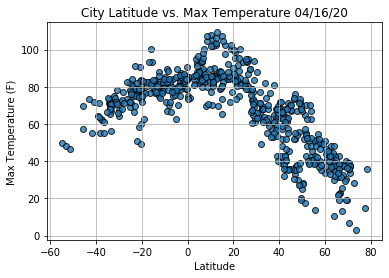

In [17]:
# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor = "black",
            linewidths=1,
            marker="o",
            alpha=0.8,
            label="Cities")
    
# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")
plt.grid()

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

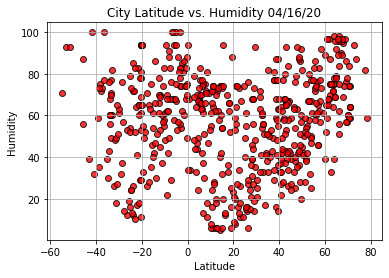

In [18]:
# Build the scatter plot for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor = "black",
            linewidths=1,
            color="red",
            marker="o",
            alpha=0.8,
            label="Cities")
    
# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.xlabel("Latitude")
plt.ylabel("Humidity")
plt.grid()

# Save the figure.
plt.savefig("weather_data/Fig2.png")

# Show plot.
plt.show()

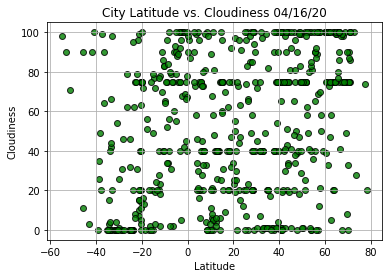

In [19]:
# Build the scatter plot for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor = "black",
            linewidths=1,
            color="green",
            marker="o",
            alpha=0.8,
            label="Cities")
    
# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness "+ time.strftime("%x"))
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")
plt.grid()

# Save the figure.
plt.savefig("weather_data/Fig3.png")

# Show plot.
plt.show()

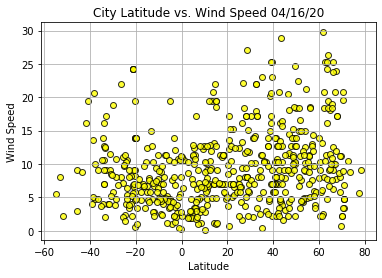

In [20]:
# Build the scatter plot for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor = "black",
            linewidths=1,
            color="yellow",
            marker="o",
            alpha=0.8,
            label="Cities")
    
# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.xlabel("Latitude")
plt.ylabel("Wind Speed")
plt.grid()

# Save the figure.
plt.savefig("weather_data/Fig4.png")

# Show plot.
plt.show()

In [21]:
from scipy.stats import linregress

In [22]:
# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.  
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):
    
    # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)
    
    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.show() 

In [23]:
index13 = city_data_df.loc[13]
index13

City                Graaff-Reinet
Lat                        -32.25
Lng                         24.53
Max Temp                       75
Humidity                       26
Cloudiness                      0
Wind Speed                      4
Country                        ZA
Date          2020-04-16 14:36:52
Name: 13, dtype: object

In [24]:
city_data_df["Lat"] >= 0

0       True
1      False
2      False
3      False
4       True
       ...  
561     True
562    False
563    False
564     True
565    False
Name: Lat, Length: 566, dtype: bool

In [25]:
# Create Northern Hemisphere DataFrame.
northern_hemi_df = city_data_df.loc[city_data_df["Lat"] >= 0]
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Araouane,18.90,-3.53,100.38,16,47,5.70,ML,2020-04-16 14:36:52
4,Kalmunai,7.42,81.82,83.17,75,81,7.18,LK,2020-04-16 14:36:52
6,Georgetown,5.41,100.34,86.00,83,20,3.36,MY,2020-04-16 14:34:07
7,Longyearbyen,78.22,15.64,35.60,59,20,9.17,SJ,2020-04-16 14:34:38
9,Jamestown,42.10,-79.24,32.00,68,75,6.93,US,2020-04-16 14:36:52


In [26]:
# Create Southern Hemisphere DataFrame.
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
1,Beloha,-25.17,45.05,82.06,54,0,9.73,MG,2020-04-16 14:36:52
2,Chuy,-33.70,-53.46,70.16,71,42,12.71,UY,2020-04-16 14:36:52
3,Ushuaia,-54.80,-68.30,50.00,71,98,5.48,AR,2020-04-16 14:36:52
5,Saint-Philippe,-21.36,55.77,78.80,65,7,24.16,RE,2020-04-16 14:36:52
8,Sao Joao Da Barra,-21.64,-41.05,77.00,83,96,2.24,BR,2020-04-16 14:36:52


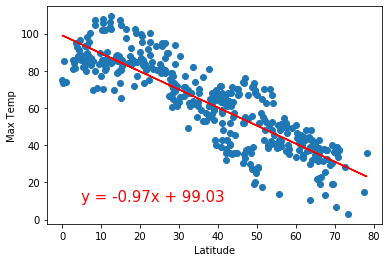

In [27]:
# Linear regression on the Northern Hemisphere 
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere for Maximum Temperature', 
                       'Max Temp',(5,10))

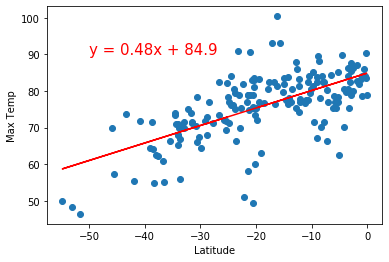

In [28]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere for Maximum Temperature', 
                       'Max Temp',(-50,90))

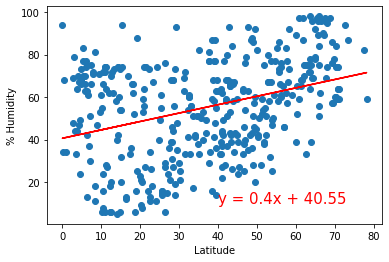

In [29]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere for % Humidity', 
                       '% Humidity',(40,10))

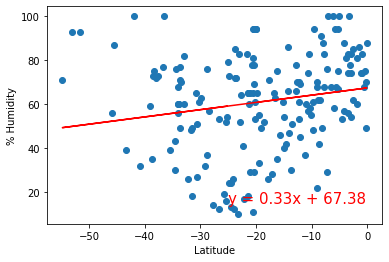

In [30]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere for % Humidity', 
                       '% Humidity',(-25,15))

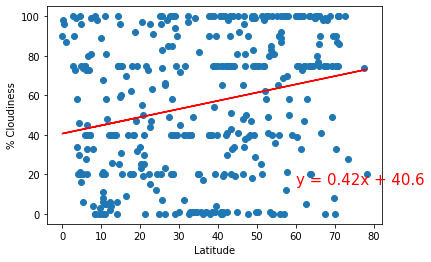

In [31]:
## Skill Drill 6.4.4
# Perform Linear Regression on the Percent Cloudiness for the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]

plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere for % Cloudiness', 
                       '% Cloudiness',(60,15))

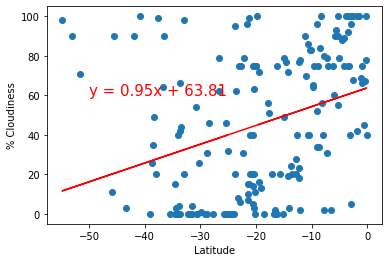

In [32]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere for % Cloudiness', 
                       '% Cloudiness',(-50,60))

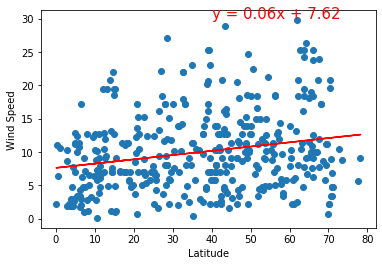

In [33]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere for Wind Speed', 
                       'Wind Speed',(40,30))

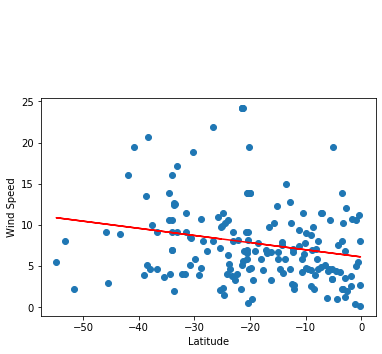

In [34]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere for Wind Speed', 
                       'Wind Speed',(-50,35))